# K-Mean 觀察 : 使用輪廓分析

# [作業目標]
- 試著模仿範例寫法, 利用隨機生成的 5 群高斯分布資料, 以輪廓分析來觀察 K-mean 分群時不同 K 值的比較

# [作業重點]
- 使用輪廓分析的圖表, 以及實際的分群散佈圖, 觀察 K-Mean 分群法在 K 有所不同時, 分群的效果如何變化 (In[3], Out[3])

# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  

In [32]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import pandas as pd

%matplotlib inline

In [3]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

In [4]:
# 計算並繪製輪廓分析的結果
print(X.shape)
print(X)
print(y.shape)
print(y)

(500, 2)
[[ 9.01742889  3.53826763]
 [-0.77872546 -2.58067738]
 [ 9.97648703  4.77979357]
 [ 4.62202905  0.06872601]
 [ 9.56248249  3.54238946]
 [ 4.16506661 -1.05599654]
 [ 0.38179854 -3.96527091]
 [ 8.93545608  3.09158212]
 [ 5.88879505 -6.30225906]
 [ 4.35553035 -5.88262305]
 [ 4.0634105  -3.57273923]
 [ 9.73211208  3.38882045]
 [ 8.99125912  5.5010311 ]
 [-6.7141608  -0.15803196]
 [10.49670089  4.58403709]
 [-1.15713199 -0.97959263]
 [ 9.65373104  2.74809615]
 [-6.78357351  0.35667678]
 [ 1.19413897 -1.82708636]
 [ 8.25527629  4.47059477]
 [ 0.75008164 -2.25181519]
 [ 7.77325213  4.79812076]
 [-0.42937616 -3.27017895]
 [ 9.06821832  3.69651925]
 [ 5.36351183 -1.37757708]
 [ 5.09158776 -5.37441635]
 [-5.433328    3.98492083]
 [ 8.87614169  3.98380905]
 [ 8.03905112  3.56903261]
 [-6.14542186 -0.66575703]
 [-0.48375305 -4.43026735]
 [-5.95394321 -0.28286993]
 [-0.29987107 -2.20666133]
 [10.02914705  3.74393665]
 [-4.56691262  1.39591497]
 [-3.5484173  -2.87163863]
 [-0.93106004 -2.34

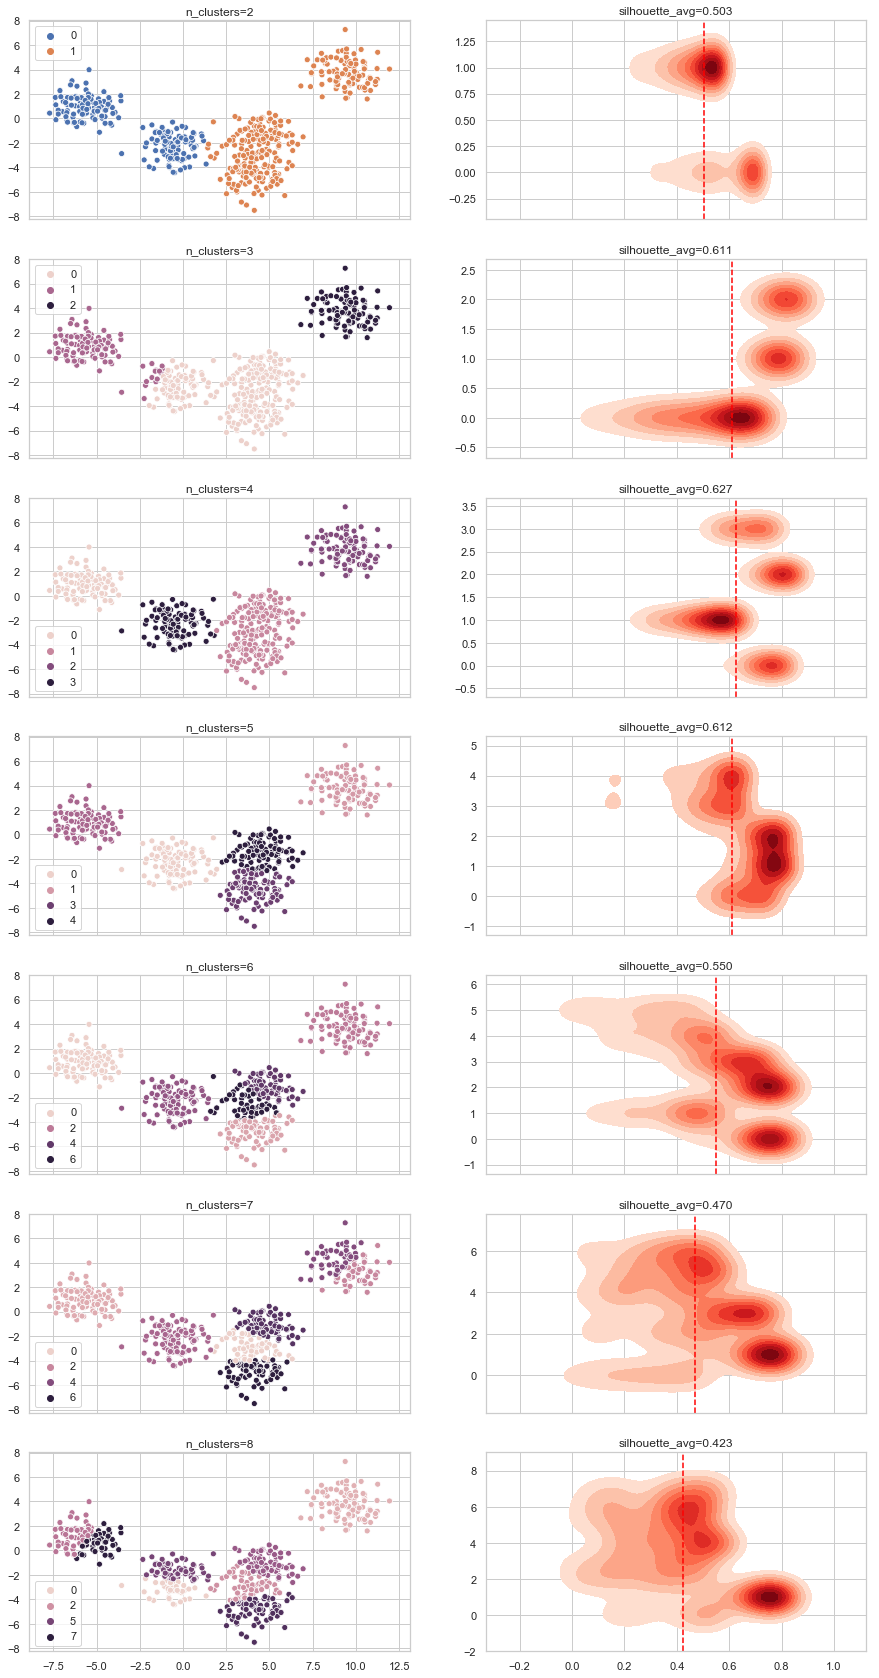

In [75]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

fig, ax = plt.subplots(7, 2, figsize=(15,30), sharex="col")

for i, n_clusters in enumerate(range_n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    
    sns.set(style="whitegrid")    
    sns.scatterplot(x=X[:, 0], y=X[:,1], hue=cluster_labels, ax=ax[i, 0]).set_title("n_clusters={}".format(n_clusters))    
    sns.kdeplot(sample_silhouette_values, cluster_labels, shade=True, cmap="Reds", legend=True, shade_lowest=False, ax=ax[i, 1]).set_title("silhouette_avg={:.3f}".format(silhouette_avg))  
    ax[i, 1].axvline(x=silhouette_avg, color="red", linestyle="--")